**The columns in the given dataset are as follows:**

name

year

selling_price

km_driven

fuel

seller_type

transmission

Owner

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
df_new= df.copy()

In [10]:
df_new = df_new.drop('Car_Name',axis=1)

In [11]:
df_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df_new['used_years']= 2020-df_new['Year']

In [13]:
df_new= df_new.drop('Year',axis=1)

In [14]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,used_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Encoding the Dataset

In [15]:
df_new['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [16]:
df_new['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [17]:
df_new['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df_new=pd.get_dummies(df_new,drop_first=True)

In [19]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,used_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [20]:
df_new=pd.get_dummies(df_new,columns=['Owner'],drop_first=True)

In [21]:
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,used_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,3.35,5.59,27000,6,0,1,0,1,0,0
1,4.75,9.54,43000,7,1,0,0,1,0,0
2,7.25,9.85,6900,3,0,1,0,1,0,0
3,2.85,4.15,5200,9,0,1,0,1,0,0
4,4.60,6.87,42450,6,1,0,0,1,0,0


## EDA

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

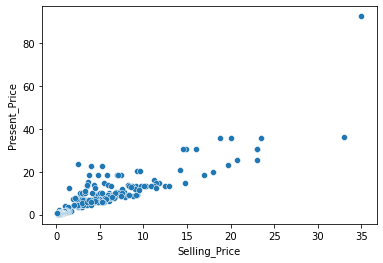

In [22]:
sns.scatterplot(x='Selling_Price',y='Present_Price',data=df_new)

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

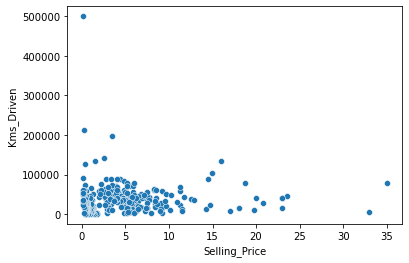

In [23]:
sns.scatterplot(y='Kms_Driven',x='Selling_Price',data=df_new)

<AxesSubplot:xlabel='Selling_Price', ylabel='used_years'>

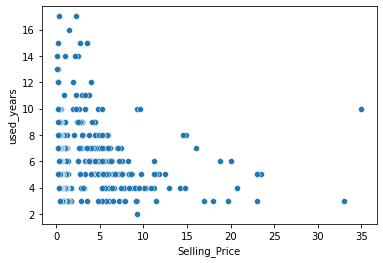

In [24]:
sns.scatterplot(y='used_years',x='Selling_Price',data=df_new)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

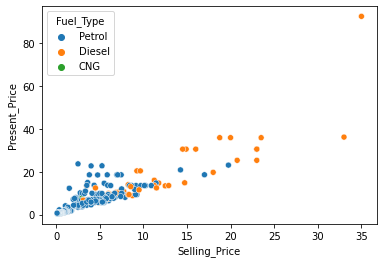

In [25]:
sns.scatterplot(x='Selling_Price',y='Present_Price',hue='Fuel_Type',data=df)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

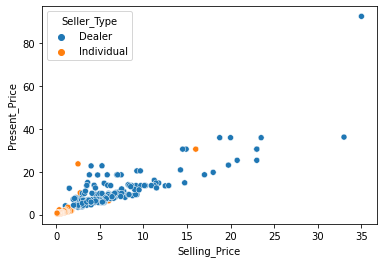

In [26]:
sns.scatterplot(x='Selling_Price',y='Present_Price',hue='Seller_Type',data=df)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

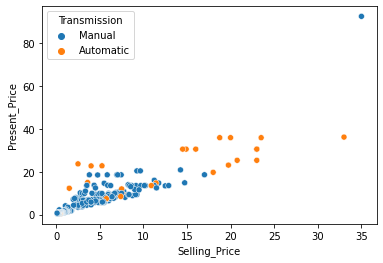

In [27]:
sns.scatterplot(x='Selling_Price',y='Present_Price',hue='Transmission',data=df)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

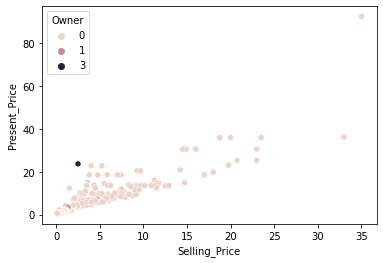

In [28]:
sns.scatterplot(x='Selling_Price',y='Present_Price',hue='Owner',data=df)

<AxesSubplot:xlabel='Selling_Price'>

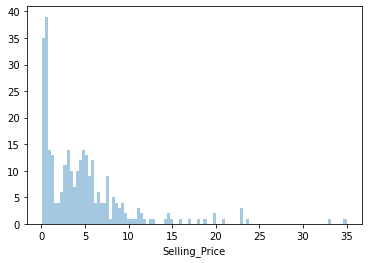

In [29]:
sns.distplot(df['Selling_Price'],kde=False,bins=100)

<AxesSubplot:>

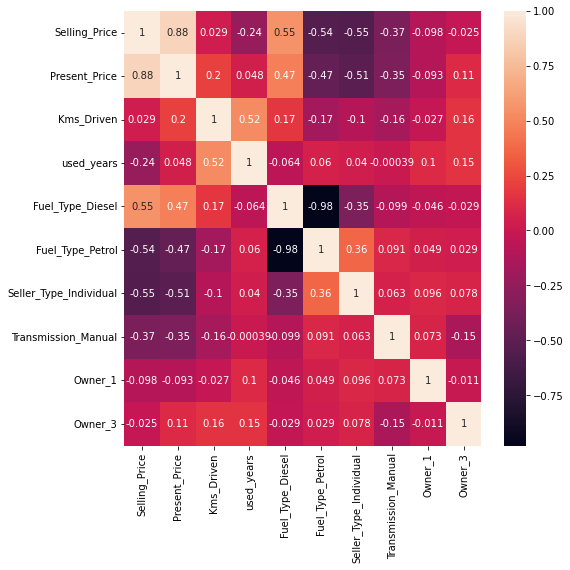

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True)

### Feature Importance 

In [31]:
from sklearn.tree import ExtraTreeRegressor

In [32]:
ET= ExtraTreeRegressor()

In [33]:
X= df_new.drop('Selling_Price',axis=1)
y= df_new['Selling_Price']

In [34]:
ET.fit(X,y)

ExtraTreeRegressor()

In [35]:
feature_imp = pd.DataFrame(ET.feature_importances_ ,index=X.columns)
feature_imp.sort_values(by=0,ascending=False)

,0
Present_Price,0.578766
Seller_Type_Individual,0.235598
Kms_Driven,0.122181
used_years,0.049679
Fuel_Type_Petrol,0.012181
Transmission_Manual,0.000893
Owner_1,0.000594
Fuel_Type_Diesel,0.000104
Owner_3,0.000004


<AxesSubplot:>

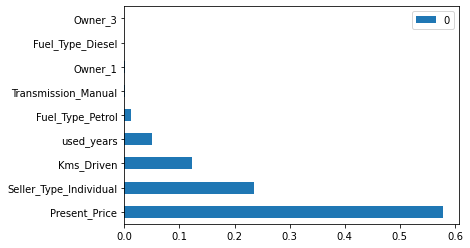

In [36]:
feature_imp.sort_values(by=0,ascending=False).plot(kind='barh')

## Outliers

In [37]:
from scipy import stats

In [38]:
dfNew=df_new[(np.abs(stats.zscore(df_new))<3).all(axis=1)]

In [39]:
df_new.shape

(301, 10)

In [40]:
dfNew.shape

(275, 10)

## Train and Test Data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X= dfNew.drop('Selling_Price',axis=1)
y= dfNew['Selling_Price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

## Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler= StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating a Model

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,r2_score
gbr=GradientBoostingRegressor(max_depth=5)

gbr.fit(X_train,y_train)
P1=gbr.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P1)))
print(mean_absolute_error(y_test,P1))
print(mean_squared_error(y_test,P1))
print(r2_score(y_test,P1))

0.10354769082936635
0.5359564483894234
0.651515874928772
0.9608214093733486


## Hyper parameter tuning

In [48]:
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV


rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=True, cv = 10, n_iter=5)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450],
                                        'subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, verbose=True)

In [50]:
P2= rs.predict(X_test)

print(mean_absolute_error(y_test,P2))
print(mean_squared_error(y_test,P2))
print(r2_score(y_test,P2))

0.5846561525380825
0.7338786015059908
0.9558685668231707


In [51]:
rs.best_params_

{'subsample': 0.9,
 'n_estimators': 200,
 'max_leaf_nodes': 7,
 'max_features': None,
 'max_depth': 2,
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

In [52]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'subsample': [0.9,1.0,1.1],
 'n_estimators': [100,150,200],
 'max_leaf_nodes': [3,4,5],
 'max_depth': [1,2,3],
 'learning_rate': [0.04,0.05,0.06],
 'criterion': ['friedman_mse']}

gs_model_2 = GridSearchCV(estimator=GradientBoostingRegressor(),
                          param_grid = grid_2,
                          cv=5,
                          verbose=True)

In [53]:
gs_model_2.fit(X_train,y_train)
P3= gs_model_2.predict(X_test)

print(mean_absolute_error(y_test,P3))
print(mean_squared_error(y_test,P3))
print(r2_score(y_test,P3))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
0.5544431900620824
0.7184097951620965
0.9567987759777774


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

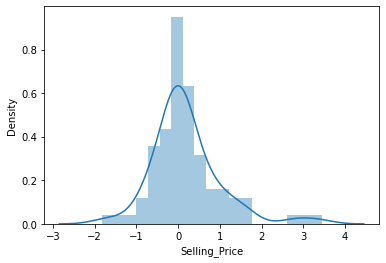

In [54]:
sns.distplot(y_test-P3)

<AxesSubplot:xlabel='Selling_Price'>

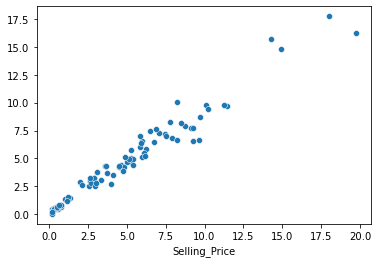

In [55]:
sns.scatterplot(y_test,P3)

In [56]:
import pickle

#open the file where we want to save the file
file= open('Car Price Prediction.pkl','wb')

#dump the information to the file

pickle.dump(gs_model_2,file)